## Neisseria Gonorrhoeae Figures
This notebook will contain figures generated from data from my 4th year master's project. I am analysing whole-genome sequence data of Neisseria Gonorrhoea from South Africa: their genomes will be characterised; anti-microbial resistance determinants will be identified; genomes will be compared.

### An exploration of my South African data

In [111]:
#pip install pandas
import pandas as pd

my_mlst: pd.DataFrame = pd.read_csv("Data/mydata_mlst.csv", sep = ",", header = "infer")

my_mlst.head()

my_mlst.ST = my_mlst.ST.astype(str)
my_mlst.shape

my_ngstar: pd.DataFrame = pd.read_csv("Data/mydata_ngstar.csv", sep = ",", header = "infer")

my_ngstar.head()

my_ngstar.ST = my_ngstar.ST.astype(str)
my_ngstar.shape

(110, 3)

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/357874325.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/357874325.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/357874325.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


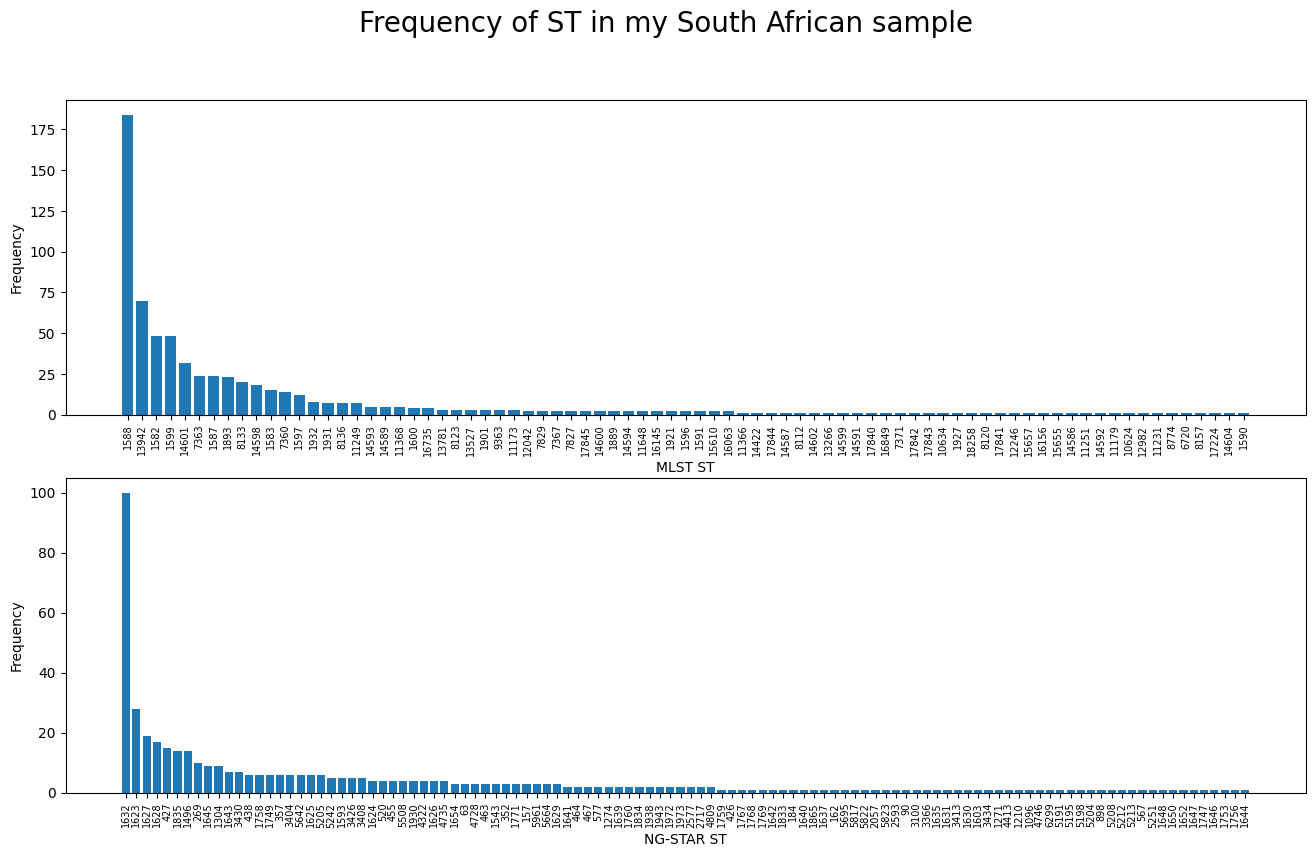

In [121]:
#!pip install matplotlib
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (16,9))

ax[0].bar(x = my_mlst.ST, height = my_mlst.Frequency)

ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)
ax[0].set_xlabel("MLST ST")
ax[0].set_ylabel("Frequency")

ax[1].bar(x = my_ngstar.ST, height = my_ngstar.Frequency)

ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)
ax[1].set_xlabel("NG-STAR ST")
ax[1].set_ylabel("Frequency")

fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

fig.show()


/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/2924360902.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/2924360902.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/2924360902.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


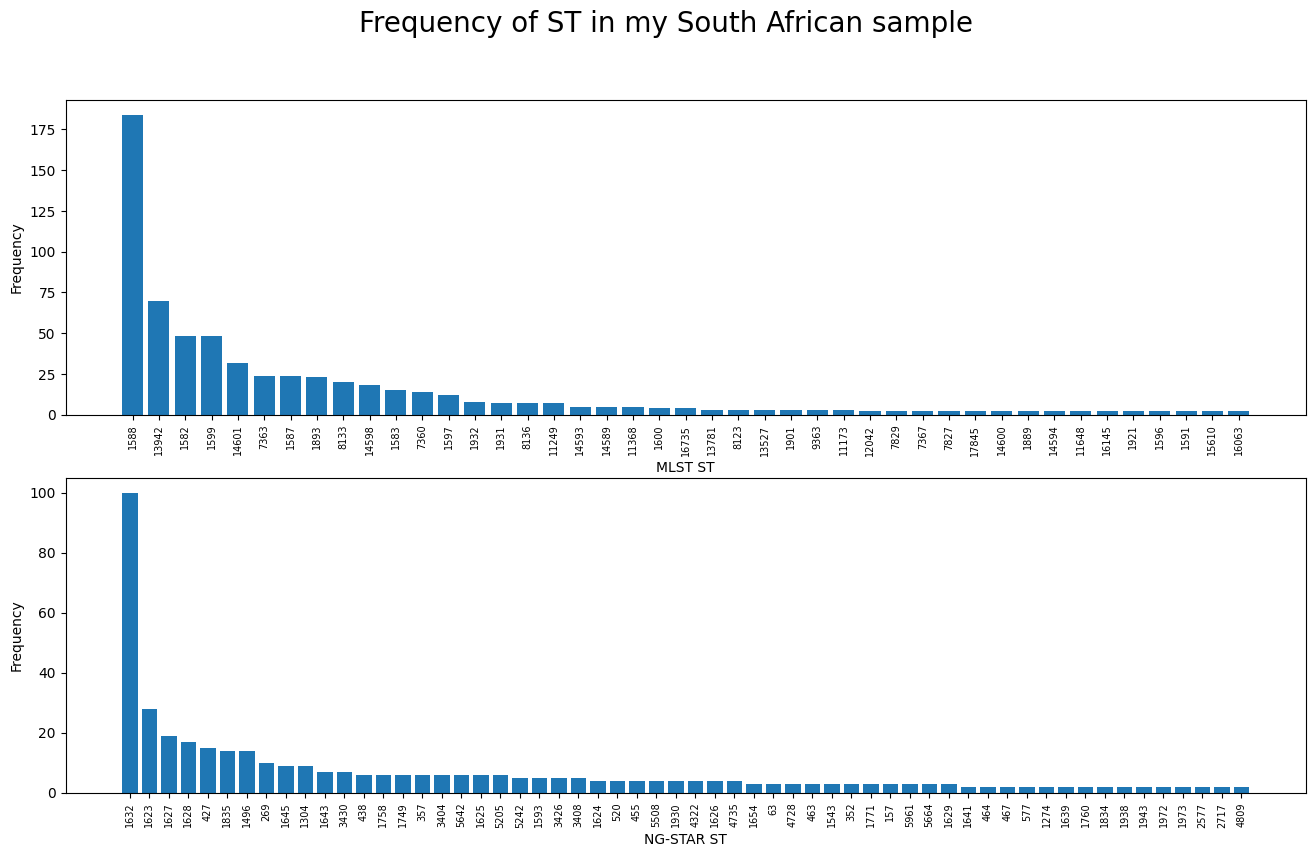

In [122]:
my_mlst2: pd.DataFrame =  my_mlst[my_mlst.Frequency != 1]

my_ngstar2: pd.DataFrame = my_ngstar[my_ngstar.Frequency != 1]

fig, ax = plt.subplots(2,1, figsize = (16,9))

ax[0].bar(x = my_mlst2.ST, height = my_mlst2.Frequency)

ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)
ax[0].set_xlabel("MLST ST")
ax[0].set_ylabel("Frequency")

ax[1].bar(x = my_ngstar2.ST, height = my_ngstar2.Frequency)

ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)
ax[1].set_xlabel("NG-STAR ST")
ax[1].set_ylabel("Frequency")

fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

fig.show()


In [55]:
my_amr: pd.DataFrame = pd.read_csv("Data/mydata_amr_prof.csv", sep = ",", header = "infer")

my_amr.head()

my_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)

my_amr.head()

my_amr = my_amr.dropna(axis = 0, how = "any")

amr_azi = my_amr.groupby(my_amr.azi_sign).azi_sign.count()
print(amr_azi)

amr_cef = my_amr.groupby(my_amr.cef_sir).cef_sir.count()
print(amr_cef)

amr_ceftri = my_amr.groupby(my_amr.ceftri_sir).ceftri_sir.count()
print(amr_ceftri)

amr_cipro = my_amr.groupby(my_amr.cipro_sir).cipro_sir.count()
print(amr_cipro)


azi_sign
=    154
Name: azi_sign, dtype: int64
cef_sir
S    154
Name: cef_sir, dtype: int64
ceftri_sir
S    154
Name: ceftri_sir, dtype: int64
cipro_sir
R    126
S     28
Name: cipro_sir, dtype: int64


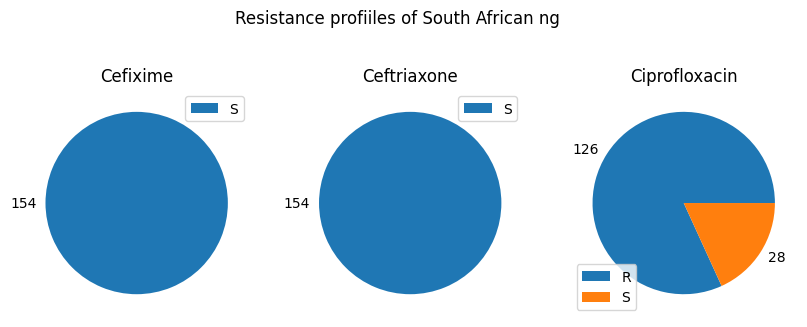

In [69]:
fig, ax = plt.subplots(1,3, figsize = (10,4))

ax[0].pie(amr_cef, labels = amr_cef)
ax[0].set_title("Cefixime")
ax[0].legend(amr_cef.keys().tolist())

ax[1].pie(amr_ceftri, labels = amr_ceftri)
ax[1].set_title("Ceftriaxone")
ax[1].legend(amr_ceftri.keys().tolist())

ax[2].pie(amr_cipro, labels = amr_cipro)
ax[2].set_title("Ciprofloxacin")
ax[2].legend(amr_cipro.keys().tolist())

fig.suptitle("Resistance profiiles of South African ng")

plt.show()